<a href="https://colab.research.google.com/github/leadeeerq/machine-learning/blob/main/2_ML41_Detekcja_anomalii_w_szeregu_czas_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import prophet

np.random.seed(41)
prophet.__version__

'1.0'

In [ ]:
df = pd.read_csv('https://storage.googleapis.com/esmartdata-courses-files/ml-course/traffic.csv', 
                 parse_dates=['timestamp'])
df.head()

timestamp    count
0 2018-09-25 14:01:00  182.478
1 2018-09-25 14:02:00  176.231
2 2018-09-25 14:03:00  183.917
3 2018-09-25 14:04:00  177.798
4 2018-09-25 14:05:00  165.469

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14398 entries, 0 to 14397
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  14398 non-null  datetime64[ns]
 1   count      14398 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 225.1 KB


#Wizualizacja danych

In [ ]:
px.line(df, x='timestamp', y='count', title='Anomaly Detection - web traffic', width=950, height=500,
        template='plotly_dark', color_discrete_sequence=['#42f5d4'])

In [ ]:
px.scatter(df, x='timestamp', y='count', title='Anomaly Detection - web traffic', width=950, height=500,
           template='plotly_dark', color_discrete_sequence=['#42f5d4'])

#Przygotowanie danych

Danymi wejściowymi do klasy Prophet jest obiekt DataFrame biblioteki pandas. Wejściowy DataFrame składa się z dwóch kolumn:

ds (datestamp, odpowiednio sformatowana kolumna, np. YYYY-MM-DD dla daty, YYYY-MM-DD HH:MM:SS dla dokładnego czasu )
y (kolumna numeryczna, reprezentująca wartość, którą chcemy przewidywać)

In [ ]:
df.head(3)

timestamp    count
0 2018-09-25 14:01:00  182.478
1 2018-09-25 14:02:00  176.231
2 2018-09-25 14:03:00  183.917

In [ ]:
data = df.copy()
data.columns = ['ds', 'y']
data.head(3)

ds        y
0 2018-09-25 14:01:00  182.478
1 2018-09-25 14:02:00  176.231
2 2018-09-25 14:03:00  183.917

#Budowa modelu Prophet

In [ ]:
from prophet import Prophet

Prophet?

In [ ]:
model = Prophet(daily_seasonality=True, yearly_seasonality=False, weekly_seasonality=False, 
                interval_width=0.99, changepoint_range=0.8)

model.fit(data)
forecast = model.predict(data)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_za8y4qz/zm7i4wm8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_za8y4qz/evi1wteh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66362', 'data', 'file=/tmp/tmp_za8y4qz/zm7i4wm8.json', 'init=/tmp/tmp_za8y4qz/evi1wteh.json', 'output', 'file=/tmp/tmptvep3x0h/prophet_model-20220910174558.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:45:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:46:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast.head(3)

ds       trend  yhat_lower  yhat_upper  trend_lower  \
0 2018-09-25 14:01:00  111.780250  132.859477  187.517109   111.780250   
1 2018-09-25 14:02:00  111.781089  130.373047  191.754528   111.781089   
2 2018-09-25 14:03:00  111.781928  135.595370  185.932101   111.781928   

   trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   111.780250       48.807725             48.807725             48.807725   
1   111.781089       48.872195             48.872195             48.872195   
2   111.781928       48.933135             48.933135             48.933135   

       daily  daily_lower  daily_upper  multiplicative_terms  \
0  48.807725    48.807725    48.807725                   0.0   
1  48.872195    48.872195    48.872195                   0.0   
2  48.933135    48.933135    48.933135                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper        yhat  
0                         0.0                         0.0  160.587975  
1                         0.0                         0.0  160.653284  
2                         0.0                         0.0  160.715063

In [ ]:
forecast[['ds', 'trend', 'yhat', 'yhat_lower', 'yhat_upper']].head(3)

ds       trend        yhat  yhat_lower  yhat_upper
0 2018-09-25 14:01:00  111.780250  160.587975  132.859477  187.517109
1 2018-09-25 14:02:00  111.781089  160.653284  130.373047  191.754528
2 2018-09-25 14:03:00  111.781928  160.715063  135.595370  185.932101

In [ ]:
forecast['real'] = data['y']
forecast['anomaly'] = 1
forecast.loc[forecast['real'] > forecast['yhat_upper'], 'anomaly'] = -1
forecast.loc[forecast['real'] < forecast['yhat_lower'], 'anomaly'] = -1
forecast.head(3)

ds       trend  yhat_lower  yhat_upper  trend_lower  \
0 2018-09-25 14:01:00  111.780250  132.859477  187.517109   111.780250   
1 2018-09-25 14:02:00  111.781089  130.373047  191.754528   111.781089   
2 2018-09-25 14:03:00  111.781928  135.595370  185.932101   111.781928   

   trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   111.780250       48.807725             48.807725             48.807725   
1   111.781089       48.872195             48.872195             48.872195   
2   111.781928       48.933135             48.933135             48.933135   

       daily  daily_lower  daily_upper  multiplicative_terms  \
0  48.807725    48.807725    48.807725                   0.0   
1  48.872195    48.872195    48.872195                   0.0   
2  48.933135    48.933135    48.933135                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper        yhat  \
0                         0.0                         0.0  160.587975   
1                         0.0                         0.0  160.653284   
2                         0.0                         0.0  160.715063   

      real  anomaly  
0  182.478        1  
1  176.231        1  
2  183.917        1

#Wizualizacja działania modelu

In [ ]:
px.scatter(forecast, x='ds', y='real', color='anomaly', color_continuous_scale='Bluyl', 
           title='Anomaly Detection in Time Series', template='plotly_dark', width=950, height=500)

1 doba = 1440 min

In [ ]:
future = model.make_future_dataframe(periods=1440, freq='Min')
future

ds
0     2018-09-25 14:01:00
1     2018-09-25 14:02:00
2     2018-09-25 14:03:00
3     2018-09-25 14:04:00
4     2018-09-25 14:05:00
...                   ...
15833 2018-10-06 13:54:00
15834 2018-10-06 13:55:00
15835 2018-10-06 13:56:00
15836 2018-10-06 13:57:00
15837 2018-10-06 13:58:00

[15838 rows x 1 columns]

In [ ]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds        yhat  yhat_lower  yhat_upper
0 2018-09-25 14:01:00  160.587975  130.707057  187.569160
1 2018-09-25 14:02:00  160.653284  134.785148  187.661245
2 2018-09-25 14:03:00  160.715063  132.368596  187.404915
3 2018-09-25 14:04:00  160.773286  133.539051  192.481364
4 2018-09-25 14:05:00  160.827927  130.758619  186.652408

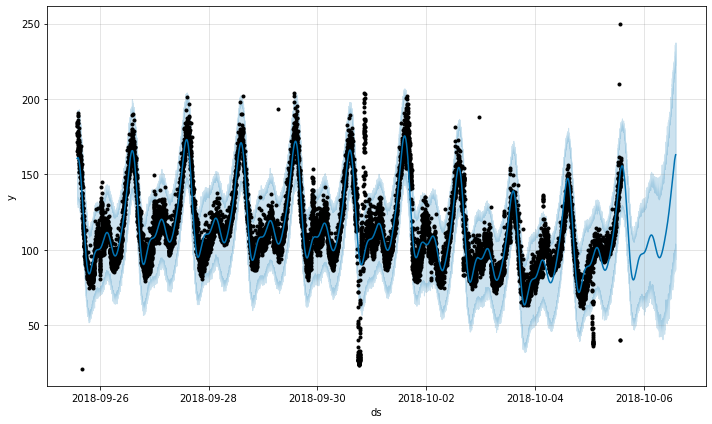

In [ ]:
_ = model.plot(forecast)

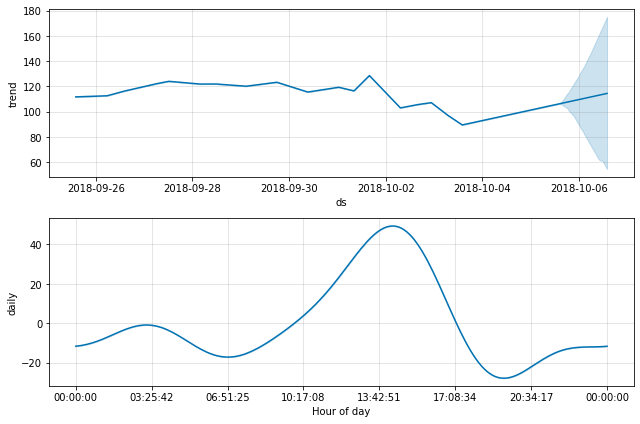

In [ ]:
_ = model.plot_components(forecast)

In [ ]:
from prophet.plot import plot_plotly

plot_plotly(model, forecast, xlabel='czas', ylabel='ruch webowy')

#Budowa modelu na podstawie wycinka danych (wrzesień)

In [ ]:
data_sep = df[df['timestamp'].dt.month == 9]
data_sep.columns = ['ds', 'y']
data_sep.head()

ds        y
0 2018-09-25 14:01:00  182.478
1 2018-09-25 14:02:00  176.231
2 2018-09-25 14:03:00  183.917
3 2018-09-25 14:04:00  177.798
4 2018-09-25 14:05:00  165.469

In [ ]:
model = Prophet(daily_seasonality=True, yearly_seasonality=False, weekly_seasonality=False, 
                seasonality_mode='multiplicative', interval_width=0.99, changepoint_range=0.8)

model.fit(data_sep)
forecast = model.predict(data_sep)
forecast[['ds', 'trend', 'yhat', 'yhat_lower', 'yhat_upper']].head(3)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_za8y4qz/33gegooz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_za8y4qz/r_wzhs9e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47712', 'data', 'file=/tmp/tmp_za8y4qz/33gegooz.json', 'init=/tmp/tmp_za8y4qz/r_wzhs9e.json', 'output', 'file=/tmp/tmp_0w91pba/prophet_model-20220910175904.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:59:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:59:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds       trend        yhat  yhat_lower  yhat_upper
0 2018-09-25 14:01:00  115.078333  165.417758  136.410450  197.482784
1 2018-09-25 14:02:00  115.062798  165.445594  133.580042  193.180934
2 2018-09-25 14:03:00  115.047263  165.469527  130.124856  197.058248

In [ ]:
forecast['real'] = data['y']
forecast['anomaly'] = 1
forecast.loc[forecast['real'] > forecast['yhat_upper'], 'anomaly'] = -1
forecast.loc[forecast['real'] < forecast['yhat_lower'], 'anomaly'] = -1
forecast.head(3)

ds       trend  yhat_lower  yhat_upper  trend_lower  \
0 2018-09-25 14:01:00  115.078333  136.410450  197.482784   115.078333   
1 2018-09-25 14:02:00  115.062798  133.580042  193.180934   115.062798   
2 2018-09-25 14:03:00  115.047263  130.124856  197.058248   115.047263   

   trend_upper     daily  daily_lower  daily_upper  multiplicative_terms  \
0   115.078333  0.437436     0.437436     0.437436              0.437436   
1   115.062798  0.437872     0.437872     0.437872              0.437872   
2   115.047263  0.438274     0.438274     0.438274              0.438274   

   multiplicative_terms_lower  multiplicative_terms_upper  additive_terms  \
0                    0.437436                    0.437436             0.0   
1                    0.437872                    0.437872             0.0   
2                    0.438274                    0.438274             0.0   

   additive_terms_lower  additive_terms_upper        yhat     real  anomaly  
0                   0.0                   0.0  165.417758  182.478        1  
1                   0.0                   0.0  165.445594  176.231        1  
2                   0.0                   0.0  165.469527  183.917        1

In [ ]:
px.scatter(forecast, x='ds', y='real', color='anomaly', color_continuous_scale='Bluyl', 
           title='Anomaly Detection in Time Series - September', template='plotly_dark', width=950, height=500)

In [ ]:
future = model.make_future_dataframe(periods=2880, freq='Min')
future

ds
0     2018-09-25 14:01:00
1     2018-09-25 14:02:00
2     2018-09-25 14:03:00
3     2018-09-25 14:04:00
4     2018-09-25 14:05:00
...                   ...
10674 2018-10-02 23:55:00
10675 2018-10-02 23:56:00
10676 2018-10-02 23:57:00
10677 2018-10-02 23:58:00
10678 2018-10-02 23:59:00

[10679 rows x 1 columns]

In [ ]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds        yhat  yhat_lower  yhat_upper
0 2018-09-25 14:01:00  165.417758  131.890772  196.181283
1 2018-09-25 14:02:00  165.445594  135.151618  196.823440
2 2018-09-25 14:03:00  165.469527  134.914385  194.069794
3 2018-09-25 14:04:00  165.489535  138.771912  195.733621
4 2018-09-25 14:05:00  165.505595  137.350432  193.510546

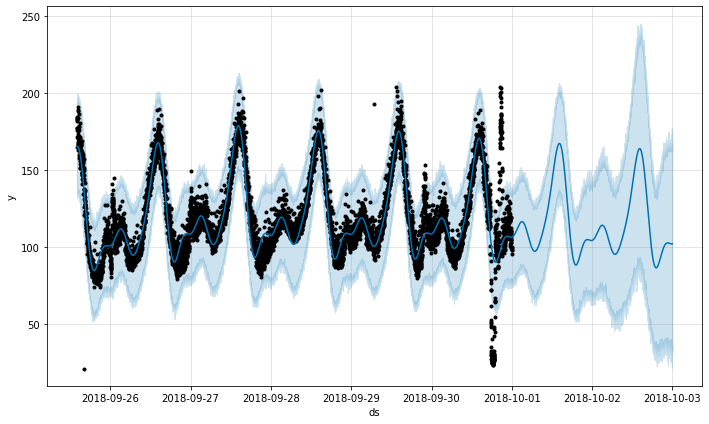

In [ ]:
_ = model.plot(forecast)

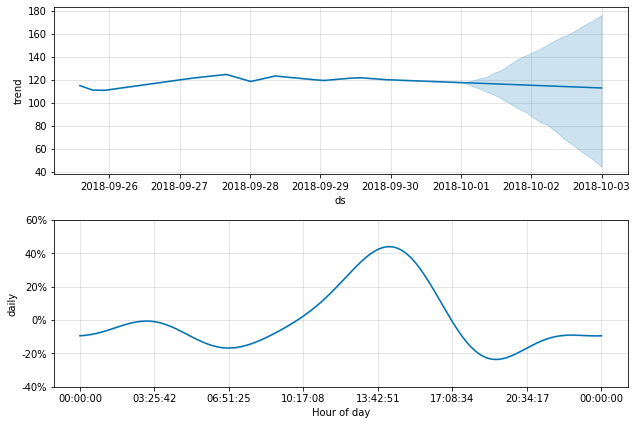

In [ ]:
_ = model.plot_components(forecast)